# Static stability analysis of an aircraft

In [19]:
from Airframe import Airframe
from misc import *

import numpy as np
import matplotlib.pyplot as plt

#### Load aircraft model

In [20]:
airframe = Airframe.from_json("rc.json") # An RC aircraft model

## Longitudinal stability

### Torque calculation

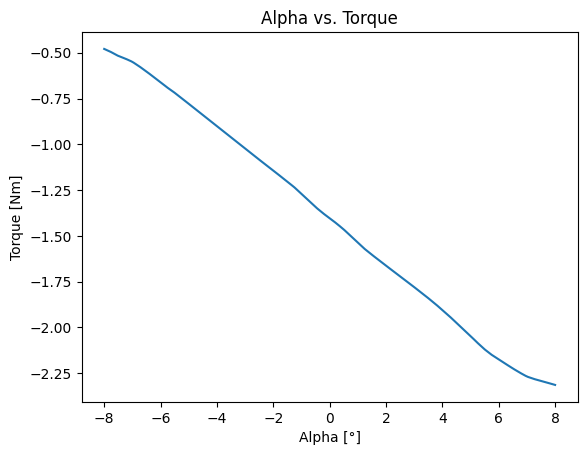

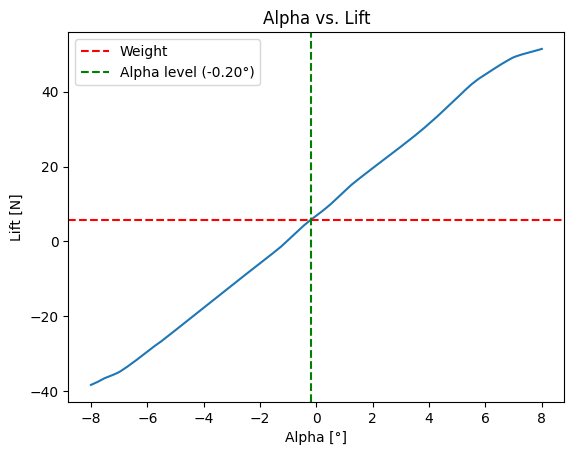

In [ ]:
N = 200 # number of points to sample

alphas = np.linspace(-8, 8, N)
taus = np.zeros(N)
lifts = np.zeros(N)

rho = 1.293 # air density
v = 10 # m/s velocity

for i, a in enumerate(alphas):
    
    tau = 0 # torque
    tau += 9.81 * airframe.m * airframe.cm[0, 0] # mass torque
    
    lift = 0 # total lift

    for surface in airframe.surfaces.values():

        if surface["Vertical"]:
            continue

        Cl = 0 # coefficient of lift

        if not "Angle" in surface:
            surface["Angle"] = 0

        alpha = (a + surface["Angle"])/180*np.pi

        if surface["Type"] == "Symetric":
            Cl, _ = symetricC(alpha)

        elif surface["Type"] == "Positive":
            Cl, _ = positiveC(alpha)

        elif surface["Type"] == "Negative":
            Cl, _ = negativeC(alpha)


        Fl = Cl * rho * v**2 * surface["Area"] # force of lift

        tau += Fl * (surface["Position"][0, 0] - airframe.cm[0, 0]) # torque
        lift += Fl

    taus[i] = tau
    lifts[i] = lift

plt.plot(alphas, taus)
plt.title("Alpha vs. Torque")
plt.xlabel("Alpha [°]")
plt.ylabel("Torque [Nm]")
plt.show()

plt.plot(alphas, lifts)
plt.title("Alpha vs. Lift")
plt.xlabel("Alpha [°]")
plt.ylabel("Lift [N]")

# vertical line at lift = weight
weight = 9.81 * airframe.m
plt.axhline(y=weight, color='r', linestyle='--', label='Weight')
plt.legend()

# horizontal line at lift = weight
alpha_min = np.min(alphas[np.where(lifts >= weight)])
plt.axvline(x=alpha_min, color='g', linestyle='--', label=f'Alpha level ({alpha_min:.1f}°)')
plt.legend()

plt.show()